# Part II - Ford GoBike Trip Dataset Investifation
## by Zaid Baig A

## Investigation Overview


> Data consists of info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc. The goal of this project will be to investigate and find new features and new insights in relation to the Ford GoBike dataset. To find the nature of the users, how often are these being used, when are they being used the maximum, etc.


## Dataset Overview

> The Dataset consists of a total of 183,412 records and 16 attributes

>The main features in the dataset according to the initial analysis are: duration_sec, start_station_id, end_station_id, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip

>The features that will help support the investigation are: duration_sec, start_station_id, end_station_id, user_type, member_birth_year, member_gender

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_copy=df.copy()
df_copy['duration_mins'] = df_copy['duration_sec']/60
df_copy['duration_hrs'] = df_copy['duration_sec']/3600
df_copy['Age'] = 2021 - df_copy['member_birth_year']
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])
df_copy['Start_Weekday'] = df_copy['start_time'].dt.day_name()
df_copy['End_Weekday'] = df_copy['end_time'].dt.day_name()
base_color = sb.color_palette('colorblind')[0]
gender_order = df['member_gender'].value_counts().index
#df_copy.columns

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Univariant Visualization Analysis

> The average time spent on the bike according to the sample set a little below a thousand seconds which in terms of minutes is approx 15mins

> Majority of the users have birth years between between 1980s and 2000s, i.e, their approx age range is 20 to 40

> In our gender comaprison we find that the majority of the users are actually male with more than 70%. With women only having a little over 20% of the distribution
 

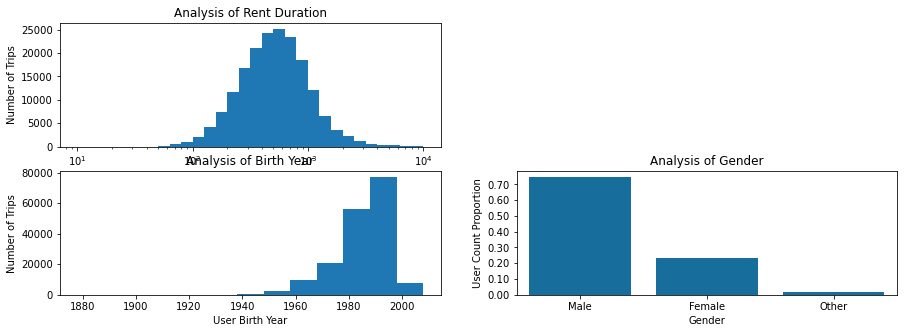

In [5]:
fig, ax = plt.subplots(figsize = [15,5]);
plt.subplot(2, 2, 1);
plt.title('Analysis of Rent Duration')
bins = 10 ** np.arange(1, 4.0+0.1, 0.1)
ticks = [10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(val) for val in ticks]
df_copy_lim=df_copy.query('duration_sec < 10000')
#df_copy.describe()
plt.hist(data=df_copy_lim, x='duration_sec', bins=bins)
plt.xticks(ticks,labels)
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Number of Trips')
plt.xscale('log')
#plt.show();

plt.subplot(2, 2, 3);
plt.title('Analysis of Birth Year')
plt.hist(data=df, x='member_birth_year', bins=np.arange(df['member_birth_year'].min(),df['member_birth_year'].max()+10,10))
plt.xlabel('User Birth Year')
plt.ylabel('Number of Trips')
#plt.show();

plt.subplot(2, 2, 4);
plt.title('Analysis of Gender')
total = df['member_gender'].value_counts().sum()
max_value = df['member_gender'].value_counts()[0]
max_prop = max_value / total

tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df, x = 'member_gender', color = base_color, order=gender_order)
plt.yticks(tick_props * total, tick_names)
plt.xlabel('Gender')
plt.ylabel('User Count Proportion');
#plt.show();

## Bivariant Visualization Analysis

> The number of users in weekends are way lesser than the number of users during the weekdays

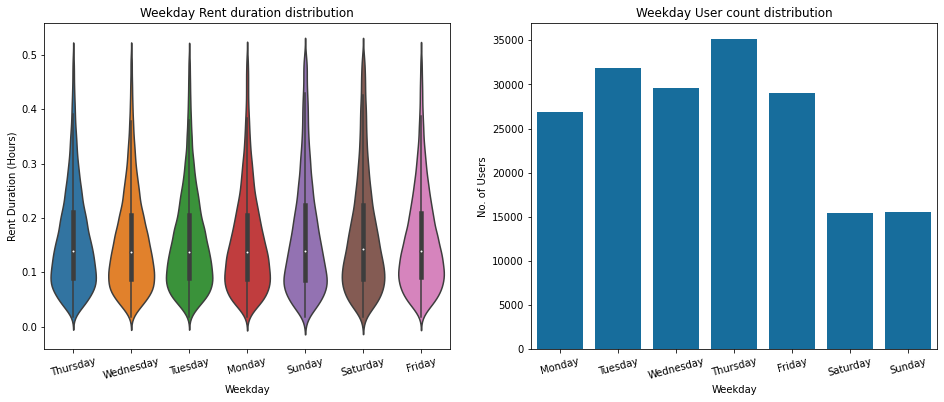

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1);
plt.title('Weekday Rent duration distribution');
sb.violinplot(data=df_copy.query('duration_hrs <= 0.5'), x='Start_Weekday', y='duration_hrs')
plt.xlabel('Weekday')
plt.xticks(rotation=15)
plt.ylabel('Rent Duration (Hours)')
#plt.show();

plt.subplot(1, 2, 2);
plt.title('Weekday User count distribution');
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sb.countplot(data=df_copy, x='Start_Weekday', color=base_color, order=order)
plt.xlabel('Weekday')
plt.xticks(rotation=15)
plt.ylabel('No. of Users')
plt.xticks(rotation=15);
#plt.show();

> The most popular station where users have as the starting point for the bike rental is "Market Street at 10th street" and the favourite end station to conclude their usage is "San Francisco Caltrain Station 2"

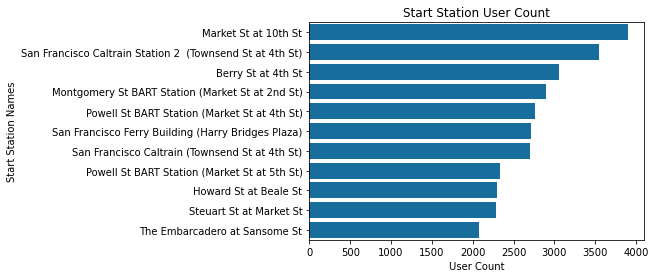

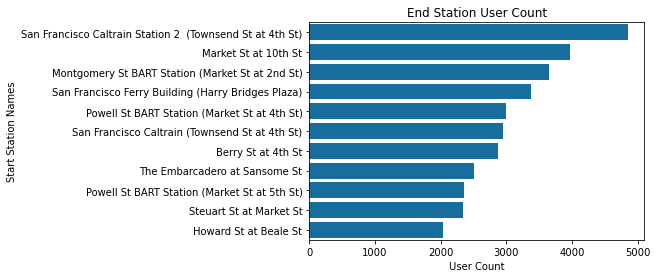

In [13]:
plt.title('Start Station User Count');
start_station_counts = df_copy['start_station_name'].value_counts()[:11].sort_values()[::-1]
sb.barplot(x=start_station_counts,y=start_station_counts.index, color=base_color)
plt.xlabel('User Count')
plt.ylabel('Start Station Names')
plt.show();

plt.title('End Station User Count');
end_station_counts = df_copy['end_station_name'].value_counts()[:11].sort_values()[::-1]
sb.barplot(x=end_station_counts,y=end_station_counts.index, color=base_color)
plt.xlabel('User Count')
plt.ylabel('Start Station Names');

## Multivariant Visualization Analysis

> Most non-subcriber type customer make use of rental bikes on more than the subcribers in terms of rent duration

> Subscribers rent duration is constantly at 10 mins during Monday to Friday and about 12 mins during the weekends. This looks like subscribers have a fixed schedule and have incorporated the use rental bikes in their day to day activities.

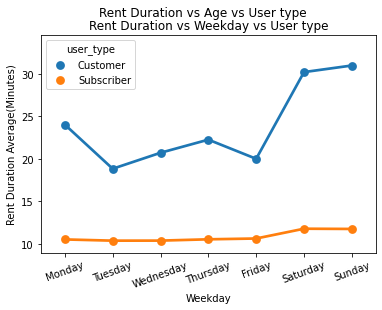

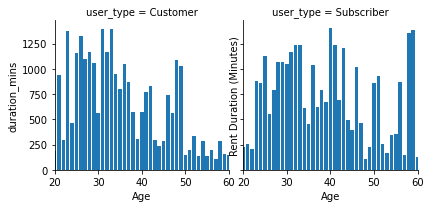

In [16]:
plt.title('Rent Duration vs Weekday vs User type');
sb.pointplot(data=df_copy, x='Start_Weekday', y='duration_mins', hue='user_type', errwidth=0, order=order)
plt.xlabel('Weekday')
plt.ylabel('Rent Duration Average(Minutes)')
plt.xticks(rotation=20);

plt.suptitle('Rent Duration vs Age vs User type');
fg = sb.FacetGrid(data = df_copy, col = 'user_type', height = 3, margin_titles = True)
fg.map(plt.bar, 'Age', 'duration_mins')
plt.xlabel('Age')
plt.ylabel('Rent Duration (Minutes)')
plt.xlim(20,60);

In [17]:
!jupyter nbconvert Ford_GoBike_slide_deck.ipynb --to slides --ServePostProcessor.port=8915 --post serve --no-input --no-prompt

^C
